In [1]:
#!pip install -U pytket pytket-quantinuum pytket-quantinuum[pecos] 

# A. tketを使った量子回路の作成　基礎編

## 1. 量子ビットの準備する

### 1-1. Circuitで量子ビット数、ビット数を指定する。$|0\rangle^{\otimes n}$が初期値
量子ビットを準備
- `Circuit('number of qubits')` 

量子ビット、ビットを準備
- `Circuit('number of qubits','number of bits')` 

量子回路を出力
- `render_circuit_jupyter(Circuit)`

In [2]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter #量子回路モデルの表示
trivial_circ = Circuit()        # no qubits or bits
quantum_circ = Circuit(2)       # 4 qubits and no bits
mixed_circ   = Circuit(2, 1)    # 4 qubits and 2 bits
render_circuit_jupyter(trivial_circ)
render_circuit_jupyter(quantum_circ)
render_circuit_jupyter(mixed_circ)

### 1-2. add_q_registerで量子ビット、add_c_registerでビットを挿入する
量子ビットを加える
- `Circuit.add_q_register('name','number of qubits')`

ビットを加える
- `Circuit.add_c_register('name','number of bits')`

量子ビットのリストを出力
- `Circuit.qubits`

ビットのリストを出力
- `Circuit.bits`

In [3]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
circ.add_c_register('cb',2)        # add 2 bits
print(circ.qubits)                 #qubit registerの確認
print(circ.bits)                   #bit registerの確認
render_circuit_jupyter(circ)

[qb1[0], qb1[1], qb2[0]]
[cb[0], cb[1]]


## 2. 準備した量子ビットに量子ゲートを作用させる

### 2-1. 基本的な量子ゲートの作用
準備した量子ビットに量子ゲートを作用させる

(制御、回転角の指定)=(無,無) 
- `Circuit.'gate_name'('terget qubit(s)')`

(制御、回転角の指定)=(有,無) 
- `Circuit.'gate_name'('control_qubit(s)','terget qubit(s)')`

(制御、回転角の指定)=(無,有) 
- `Circuit.'gate_name'('angle','terget qubit(s)')`

(制御、回転角の指定)=(有,有) 
- `Circuit.'gate_name'('angle','control_qubit(s)','terget qubit(s)')`

In [4]:
from pytket import Circuit
circ = Circuit(3)
circ.X(0)
circ.X(1)
circ.SWAP(1,2)
circ.CH(0,2)
circ.Rx(0.5,1)
circ.CCX(0,2,1)
circ.CRy(0.25,0,2)
circ.U1(0.75,0)
circ.TK1(0.75,0.25,0.5,2)
render_circuit_jupyter(circ)

### 2-2. TKETでの基本的な量子ゲート
参照：https://cqcl.github.io/tket/pytket/api/circuit_class.html#

|  量子ゲート  | 概要   |  量子ゲート | 概要 |  量子ゲート | 概要   |
| :----: | :----: | :----: | :----: | :----: | :----: |
|  **X(qubit)** |  $\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$  |  **Y(qubit)** |  $\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}$  |  **Z(qubit)** |  $\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$  |
|  **CX(c_qubit,t_qubit)** |  Controlled **X**  |  **CY(c_qubit,t_qubit)** |  Controlled **Y**  |  **CZ(c_qubit,t_qubit)** |  Controlled **Z**  |
|  **Rx(angle $\alpha$, qubit)**  | $e^{-\frac{1}{2}i\pi\alpha X}=\begin{pmatrix} \cos \frac{\alpha\pi}{2} & -i \sin \frac{\alpha\pi}{2} \\ -i \sin \frac{\alpha\pi}{2} & \cos \frac{\alpha\pi}{2} \end{pmatrix}$  |  **Ry(angle $\alpha$, qubit)**  | $e^{-\frac{1}{2}i\pi\alpha Y}=\begin{pmatrix} \cos \frac{\alpha\pi}{2} & -\sin \frac{\alpha\pi}{2} \\ \sin \frac{\alpha\pi}{2} & \cos \frac{\alpha\pi}{2} \end{pmatrix}$  |  **Rz(angle $\alpha$, qubit)** <br><span style="color: red; ">(H-series native)</span> | $e^{-\frac{1}{2}i\pi\alpha Z}=\begin{pmatrix} e^{-\frac{i\alpha\pi}{2}} & 0 \\ 0 & e^{\frac{i\alpha\pi}{2}} \end{pmatrix}$  |
|  **CRx(angle,c_qubit,t_qubit)**  | Controlled **Rx**  |  **CRy(angle,c_qubit,t_qubit)**  | Controlled **Ry**  |  **CRz(angle,c_qubit,t_qubit)**  | Controlled **Rz**  |
|  **XXPhase(angle $\alpha$, qubit0, qubit1)**  | $\begin{pmatrix} \cos \frac{\alpha\pi}{2} &0&0& -i \sin \frac{\alpha\pi}{2} \\ 0 & \cos \frac{\alpha\pi}{2}&-i \sin \frac{\alpha\pi}{2}&0\\ 0 & -i \sin \frac{\alpha\pi}{2}&\cos \frac{\alpha\pi}{2}&0\\ -i \sin \frac{\alpha\pi}{2}&0&0&\cos \frac{\alpha\pi}{2}\end{pmatrix}$  |  **YYPhase(angle $\alpha$, qubit0, qubit1)**  | $\begin{pmatrix} \cos \frac{\alpha\pi}{2} &0&0& i \sin \frac{\alpha\pi}{2} \\ 0 & \cos \frac{\alpha\pi}{2}&-i \sin \frac{\alpha\pi}{2}&0\\ 0 & -i \sin \frac{\alpha\pi}{2}&\cos \frac{\alpha\pi}{2}&0\\ i \sin \frac{\alpha\pi}{2}&0&0&\cos \frac{\alpha\pi}{2}\end{pmatrix}$   |  **ZZPhase(angle $\alpha$, qubit0, qubit1)** <br><span style="color: red; ">(H-series native)</span> | $\begin{pmatrix} e^{-\frac{i\alpha\pi}{2}} & 0 & 0 & 0 \\ 0 & e^{\frac{i\alpha\pi}{2}} & 0 & 0 \\ 0 & 0 & e^{\frac{i\alpha\pi}{2}} & 0 \\ 0 & 0 & 0 & e^{-\frac{i\alpha\pi}{2}} \end{pmatrix}$   |
| **PhasedX (angle $\alpha$,angle $\beta$, qubit)** <br><span style="color: red; ">(H-series native)</span>| **Rz($\beta$)Rx($\alpha$)Rz($-\beta$)**|**TK1($\alpha$,$\beta$,$\gamma$, qubit)** | **Rz($\alpha$) Rx($\beta$) Rz($\gamma$)** | **TK2 ($\alpha$,$\beta$,$\gamma$, qubit0, qubit1)** <br><span style="color: red; ">(H-series native)</span>| **XXPhase($\alpha$)YYPhase($\beta$)ZZphase($\gamma$)**|



|  量子ゲート |  階数  |  量子ゲート | 概要 |   量子ゲート | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: | 
|  **H(qubit)**  | $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ | **SWAP(qubit0, qubit1)** |  SWAP ゲート  | **ECR(qubit0, qubit1)** | ECR ゲート|
|  **CH(c_qubit,t_qubit)**   |  Controlled **H**  | **CSWAP(c_qubit,t_qubit0,t_qubit1)**  | Controlled **SWAP**| **CCX(c_qubit0,c_qubit1,t_qubit)** | トフォリ ゲート |
| **U1(angle $\lambda$, qubit)** | $e^{\frac{i\pi\lambda}{2}}$**Rz($\lambda$)**   | **U2(angle $\phi$, angle $\lambda$, qubit)** | $e^{\frac{i\pi(\lambda+\phi)}{2}}$ **Rz($\phi$)Ry($\frac{1}{2}$) Rz($\lambda$)** | **U3(angle $\theta$,angle $\phi$,angle $\lambda$, qubit)** | $e^{\frac{i\pi(\lambda+\phi)}{2}}$ **Rz($\phi$) Ry($\theta$) Rz($\lambda$)** |
| **CU1(angle $\lambda$, c_qubit, t_qubit)** | Controlled **U1** | **U2(angle $\phi$, angle $\lambda$, c_qubit, t_qubit)** | Controlled **U2** | **U3(angle $\theta$,angle $\phi$,angle $\lambda$, c_qubit, t_qubit)** | Controlled **U3** |

|  量子ゲート |  概要 |  量子ゲート |  概要 | 
| :----: | :----: | :----: | :----: |
|  **S(qubit)**  |  $\begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$  |  **Sdg(qubit)**  |  $\begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix}$  |
|  **CS(c_qubit, t_qubit)**  |  Controlled **S** |  **CSdg(c_qubit, t_qubit)**  |  Controlled **Sdg** |
|  **SX(qubit)**  |  $\frac{1}{2}\begin{pmatrix} 1+i & 1-i \\ 1-i & 1+i \end{pmatrix} $ | **SXdg(qubit)**  |   $\frac{1}{2}\begin{pmatrix} 1-i & 1+i \\ 1+i & 1-i \end{pmatrix}$ | 
|  **CSX(c_qubit, t_qubit)**  |  Controlled **SX** | **CSXdg(c_qubit, t_qubit)**  |  Controlled **SXdg** | 
|  **V(qubit)**  |   $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & -i \\ -i & 1 \end{pmatrix} $ |  **Vdg(qubit)**  |  $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & i \\ i & 1 \end{pmatrix} $ |
|  **CV(c_qubit, t_qubit)**  |   Controlled **V** |  **CVdg(c_qubit, t_qubit)**  |  Controlled **Vdg** |
|  **T(qubit)**  |  $\begin{pmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{pmatrix}$  |  **Tdg(qubit)**  |  $\begin{pmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{pmatrix}$  |
|  **CSX(c_qubit,t_qubit)**  |  Controlled **SX**  |  **CV(c_qubit,t_qubit)**  |  Controlled **V**  |
|  **CSXdg(c_qubit,t_qubit)**  |  Controlled **SXdg**  |  **CVdg(c_qubit,t_qubit)**  |  Controlled **Vdg**  |

### 2-3. add_gateを使った量子ゲートの作用

2-2.で挙げたゲートは`add_gate`を利用して量子回路に作用させることもできる。
- `Circuit.add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])` 

`add_gate`で作用できる量子ゲートとして、2-2.で挙げたゲート以外の量子ゲートも用意されている


|  量子ゲート |  パラメータ  | 概要 |  量子ゲート |  パラメータ  | 概要 |  量子ゲート |  パラメータ  | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
|  **CnX**  |  | n-controlled **X** | **CnY** |  | n-controlled **Y**  |  **CnZ** | | n-controlled **Z** |
|  **CnRy**  |$\lambda$ | n-controlled **Ry** $(\lambda)$ | **NPhasedX** | $(\alpha, \beta)$ | **PhasedX($\alpha$, $\beta$)${}^{\otimes n}$** | | | |

参照：https://tket.quantinuum.com/api-docs/optype.html


In [5]:
from pytket import Circuit, OpType
# add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])
circ = Circuit(3)
circ.add_gate(OpType.X,[0]) 
circ.add_gate(OpType.X,[1]) 
circ.add_gate(OpType.SWAP,[1,2])
circ.add_gate(OpType.CH,[0,2])
circ.add_gate(OpType.Rx,[0.5],[1])
circ.add_gate(OpType.CCX,[0,2,1])
circ.add_gate(OpType.CRy,[0.25],[0,2])
circ.add_gate(OpType.U1,[0.75],[0]) 
circ.add_gate(OpType.TK1,[0.75,0.25,0.5],[2])
render_circuit_jupyter(circ)

In [6]:
from pytket import Circuit, OpType
# add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])
circ = Circuit(4)
circ.add_gate(OpType.CnRy,[0.5],[0])
circ.add_gate(OpType.CnRy,[0.5],[1,0])
circ.add_gate(OpType.CnRy,[0.5],[1,2,0])
circ.add_gate(OpType.CnRy,[0.5],[1,2,3,0])
circ.add_gate(OpType.CnX,[3])
circ.add_gate(OpType.CnX,[2,3])
circ.add_gate(OpType.CnY,[1,2,3])
circ.add_gate(OpType.CnZ,[0,1,2,3])
circ.add_gate(OpType.NPhasedX,[0.25,0.5],[0,2])
circ.add_gate(OpType.NPhasedX,[0.5,0.15],[1,2,3])
render_circuit_jupyter(circ)

### 2-4. その他の特別な量子ゲートの作用

|  量子ゲート |  パラメータ  | 概要 |  量子ゲート |  パラメータ  | 概要 |  量子ゲート |  パラメータ  | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
| **StatePreparationBox** | 状態ベクトル | 状態ベクトルを構成する量子ゲート | **DiagonalBox** |対角なユニタリー行列 | 対角なユニタリー行列の量子ゲート | | | |
|  **Unitary1qBox**  |$2\times 2$ | $2\times 2$ユニタリー行列 | **Unitary2qBox** | $4\times 4$ | $4\times 4$ユニタリー行列 | **Unitary3qBox** |$8\times 8$ | $8\times 8$ユニタリー行列 |

#### 与えられた量子状態を準備する量子ゲートを構成
`StatePreparationBox`を利用すれば、初期値として特定の量子状態を準備することができる。  

ここでは、W状態
$$ |W\rangle = \frac{1}{\sqrt{3}}(|001\rangle+|010\rangle+|100\rangle)$$
を`StatePreparationBox`を利用して準備する

In [7]:
from pytket.circuit import StatePreparationBox
import numpy as np

w_state = 1 / np.sqrt(3) * np.array([0, 1, 1, 0, 1, 0, 0, 0])

w_state_box = StatePreparationBox(w_state)

circ = Circuit(3)
circ.add_state_preparation_box(w_state_box, [0, 1, 2])
render_circuit_jupyter(circ)



#### 対角成分のみからなるユニタリー行列を量子ゲートに変換
`DiagonalBox`を利用すれば、対角成分のみからなるユニタリー行列を量子ゲートを準備することができる。  

ここでは、
$$ \left(\begin{array}{cc}1&0&0&0\\0&-1&0&0\\0&0&-1&0\\0&0&0&-1\end{array}\right)$$
を`DiagonalBox`を利用して準備する

In [8]:
from pytket.circuit import Circuit, DiagonalBox

diag = np.asarray([1,-1,-1,-1])
diagbox = DiagonalBox(diag)

circ = Circuit(2)
circ.add_diagonal_box(diagbox,[0,1])
render_circuit_jupyter(circ)

#### 行列表示によって与えられたユニタリー行列を量子ゲートに変換

In [9]:
from pytket.circuit import Circuit, Unitary1qBox, Unitary2qBox, Unitary3qBox

u1 = np.asarray([[2/3, (-2+1j)/3],
                 [(2+1j)/3, 2/3]])
u1box = Unitary1qBox(u1)

u2 = np.asarray([[0, 1, 0, 0],
                 [0, 0, 0, -1],
                 [1, 0, 0, 0],
                 [0, 0, -1j, 0]])
u2box = Unitary2qBox(u2)

circ = Circuit(3)
circ.add_unitary1qbox(u1box, 0)
circ.add_unitary2qbox(u2box, 1, 2)
circ.add_unitary1qbox(u1box, 2)
circ.add_unitary2qbox(u2box, 1, 0)
render_circuit_jupyter(circ)

## 3. Z基底$\{|0\rangle,|1\rangle\}$での測定

- `Circuit.Measure('qubit','bit')`

として利用

- Z基底以外で測定をしたい場合には、測定の直前でZ基底を基底変換する

In [10]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter
circ = Circuit(2, 2)
circ.Measure(0, 0)  #  measurement on qubit 0, saving result in bit 0
circ.add_barrier([0,1])
circ.H(1) # change of basis
circ.Measure(1, 1)  # X-basis measurement on qubit 1, saving result in bit 1
render_circuit_jupyter(circ)

測定結果を上書きすることが可能

In [11]:
from pytket import Circuit
circ = Circuit(2, 1)
circ.Measure(0, 0)  # measurement on qubit 0
circ.X(1)
circ.Measure(1, 0)  # overwrites the first result with the measurement on qubit 1
render_circuit_jupyter(circ)

すべての量子ビットを測定する
- `Circuit.measure_all()`

量子ビット数に対してビット数が少ない場合にはビットを補完する

In [12]:
from pytket import Circuit
# measure qubit 0 in Z basis and 1 in X basis
circ = Circuit(2, 2)
circ.measure_all()
render_circuit_jupyter(circ)

circ = Circuit(2, 1)
circ.measure_all()
render_circuit_jupyter(circ)

# measure_all() adds bits if they are not already defined, so equivalently
circ = Circuit(2)
circ.measure_all()
render_circuit_jupyter(circ)

レジスターを指定して量子ビットを測定する
- `Circuit.measure_register('QubitRegister','name of BitRegister to be created')`

QubitRegisterのリストは以下で取得可能
- `Circuit.q_registers`

In [13]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
render_circuit_jupyter(circ)

In [14]:
circ.q_registers

[QubitRegister("qb1", 2), QubitRegister("qb2", 1)]

QubitRegister("qb1", 2)を測定する

In [15]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
circ.measure_register(circ.q_registers[0],'cb')
render_circuit_jupyter(circ)

## 4. QuantinuumのHシリーズ エミュレータでJobを実行[復習]

### 重ね合わせ状態を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$$

In [16]:
from pytket import Circuit, OpType
circ = Circuit(1, 1)
circ.H(0)
circ.Measure(0, 0)
render_circuit_jupyter(circ)

In [17]:
from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline
from qiskit.visualization import plot_histogram
api = QuantinuumAPIOffline()

quantinuum_backend = QuantinuumBackend(device_name ='H1-1LE',api_handler = api)

量子回路をQuantinuumの量子デバイスで用意されているゲートセットで書き直し、エミュレータでその量子回路を実行する

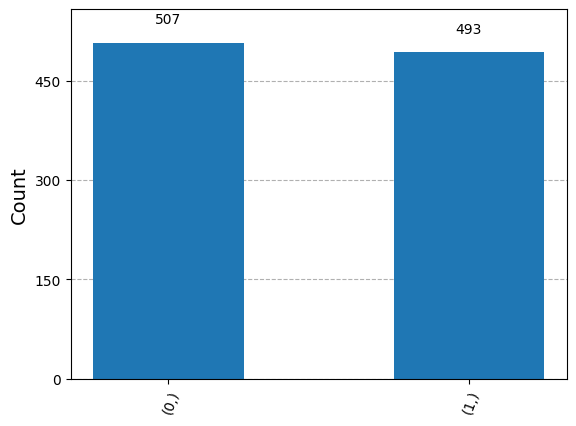

In [18]:
compiled_circ = quantinuum_backend.get_compiled_circuit(circ)
render_circuit_jupyter(compiled_circ)

handle = quantinuum_backend.process_circuit(compiled_circ, n_shots =1000)
result_counts = quantinuum_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

## 5. Mid circuit measurementとFeedforward
#### 下記はMid-circuit measurement, feedforwardと呼ばれている機能で、量子誤り訂正や量子テレポーテション等に必要不可欠な機能です。  
#### 現在、この機能が実装されている量子コンピュータはQuantinuum Hシリーズ量子コンピュータとIBM Quantumの量子コンピュータです。

In [19]:
from pytket import Circuit, OpType
circ = Circuit(2, 1)
circ.H(0)
circ.Measure(0, 0)

# Actively reset state to |0>
circ.add_gate(OpType.Reset, [0])

# Conditionally flip state to |1> to reflect measurement result
circ.X(0, condition_bits=[0], condition_value=1)

# Use the qubit as if the measurement was non-destructive
circ.CX(0, 1)
circ.Measure(1,0)
render_circuit_jupyter(circ)

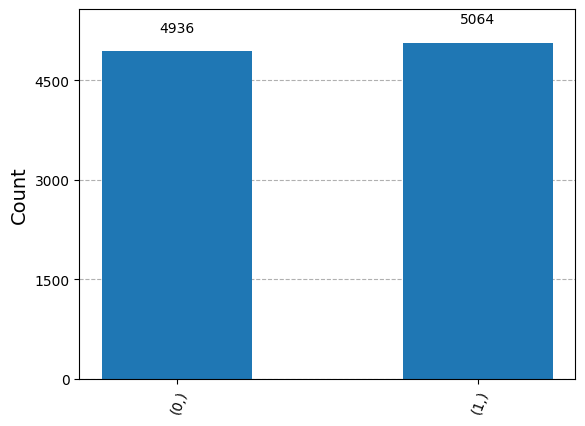

In [20]:
compiled_circ = quantinuum_backend.get_compiled_circuit(circ)
render_circuit_jupyter(compiled_circ)

handle = quantinuum_backend.process_circuit(compiled_circ, n_shots =10000)
result_counts = quantinuum_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

## 6. バリア (オプション)
バリアは命令として存在しますが、能動的な操作は行いません。その代わり、その機能は2つあります。
- 実行時には、バリアより前の操作がバリアより後の操作の開始前に終了していることを保証する。
- コンパイル時に、コンパイラがバリアの周囲で操作を並べ替えるのを防ぐ。

バリアの挿入
- `Circuit.add_barrier(['qubit(s)'],['bit(s)'])`

※バリアの除去は`pytket.passes`に組み込まれている
- `RemoveBarriers().apply(Circuit)`

In [21]:
from pytket import Circuit
circ = Circuit(3, 2)
circ.CX(1, 2)
circ.Measure(0, 0)
circ.Measure(2, 1)
render_circuit_jupyter(circ)

In [22]:
from pytket import Circuit
circ = Circuit(3, 2)
circ.CX(1, 2)
circ.add_barrier([0, 1, 2], [0, 1]) # add a barrier on all qubits and bits
circ.Measure(0, 0)
circ.Measure(2, 1)
render_circuit_jupyter(circ)

In [23]:
from pytket.passes import RemoveBarriers
RemoveBarriers().apply(circ)
render_circuit_jupyter(circ)

# B. TKETを使った量子回路の作成　応用編

## 7. 量子回路のボックス化
任意の量子回路を実装するためには、個々の基本ゲートで作業すれば十分です。
しかし、それが最も便利な方法であるとは限りません。
一般に、より高度な構造を使って量子回路を構築した方がはるかに簡単です。
pytketでは、複雑な構造を抽象化するために、「ボックス」という概念を用いています。

CircBoxでは、Circuitを1つのsubcircuitとして定義し、あたかも1つのゲートであるかのように見せることができます。

- `CircBox(Circuit)`

としてボックス化することが可能

- `Circuit.add_circbox('box name',['qubit(s)'])`

としてボックスを量子回路に作用させることが可能

In [24]:
from pytket.circuit import Circuit, CircBox
sub = Circuit(2)
sub.CX(0, 1).Rz(0.2, 1).CX(0, 1)
render_circuit_jupyter(sub)
sub_box = CircBox(sub)

circ = Circuit(3)
circ.add_circbox(sub_box, [0, 1])
circ.X(1)
circ.add_circbox(sub_box, [2, 1])
circ.add_circbox(sub_box, [0, 2])
render_circuit_jupyter(circ)

## 8. 制御量子ゲートのカスタマイズ
制御量子ビットの状態によって、量子ゲートやサブサーキットをターゲットとなる量子ビットに適用する/しない機能をもった制御量子ゲートをカスタマイズすることができる。
- `QControlBox('gate or CircBox','number of c_qubits')`

量子ゲートは次の操作でカプセル化をする必要がある

回転角の指定: 無 
- Op.create(OpType.'gate_name')

回転角の指定: 有
- Op.create(OpType.'gate_name','angle')

In [25]:
from pytket.circuit import Op, OpType, QControlBox
ops = Op.create(OpType.S)
opRx = Op.create(OpType.Rx,0.25)

ccs = QControlBox(ops, 2)
ccRx = QControlBox(opRx, 3)
cbox = QControlBox(sub_box, 1)

circ = Circuit(4)
circ.add_qcontrolbox(ccs, [0,2,1])
circ.add_qcontrolbox(ccRx, [0,2,3,1])
circ.add_qcontrolbox(cbox, [0,2,3])
render_circuit_jupyter(circ)

## 9. 状態の確認とユニタリー行列の確認
作成した量子回路が与える量子状態を確認することができます。
量子回路の構成が正しいかどうかをチェックするのに役立ちます。

量子回路が適用された後のシステムの状態ベクトルを生成。すべての量子ビットが初期化された状態であると仮定しています。
- `Circuit.get_statevector()`

量子回路で適用されるユニタリー行列を数値的に計算
- `Circuit.get_unitary()`

In [26]:
from pytket import Circuit
circ=Circuit(2)
circ.H(0).CX(0,1)
circ.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [27]:
from pytket import Circuit
circ=Circuit(2)
circ.H(0).CZ(0,1).H(1)
circ.get_unitary()

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j]])

## 10. 量子回路の解析

量子回路に含まれる量子ビット数、ビット数の出力
- `Circuit.n_qubits`
- `Circuit.n_bits`

ゲート数：量子回路に含まれるゲート数  
深さ：並列に実行可能なゲートを1グループとしたときのグループ数

量子回路のゲートの総数、深さの出力
- `Circuit.n_gates`
- `Circuit.depth()`

特定の量子ゲートに着目して、ゲート数、深さを算出することも可能
- `Circuit.n_gates_of_type(OpType.'gate_name')`
- `Circuit.depth_by_type(OpType.'gate_name')`
  
複数の量子ゲートのリストを渡せば、複数の量子ゲートの深さを算出することも可能
- `Circuit.depth_by_type({OpType.'gate_name1',OpType.'gate_name2',...})`

1量子ビットゲートの総数、2量子ビットゲートの総数、3量子ビットゲートの総数、２量子ビットゲートの深さを算出することも可能
- `Circuit.n_1qb_gates()`
- `Circuit.n_2qb_gates()`
- `Circuit.n_nqb_gates(3)`
- `Circuit.depth_2qb()`




In [28]:
from pytket import Circuit, OpType
circ = Circuit(4,2)
circ.T(0).X(1).CX(0, 1).CX(2, 3).T(3).CZ(0, 2).CCX(1,2,3)
circ.CZ(1, 3)
circ.T(1)
circ.Measure(1,0)

[T q[0]; X q[1]; CX q[2], q[3]; CX q[0], q[1]; T q[3]; CZ q[0], q[2]; CCX q[1], q[2], q[3]; CZ q[1], q[3]; T q[1]; Measure q[1] --> c[0]; ]

In [29]:
render_circuit_jupyter(circ)
print("qubit count =", circ.n_qubits)
print("bit count =", circ.n_bits)
print("total gate count =", circ.n_gates)
print("circuit depth =", circ.depth())
print("X gate count =", circ.n_gates_of_type(OpType.X))
print("X gate depth =", circ.depth_by_type(OpType.X))
print("CX and CZ gate depth =", circ.depth_by_type({OpType.CX, OpType.CZ}))
print("1qb gates =", circ.n_1qb_gates())
print("2qb gates =", circ.n_2qb_gates())
print("3qb gates =", circ.n_nqb_gates(3)) # count the quantum gate for three qubit (n=3)
print("2qb gate depth =", circ.depth_2q())
print('CX and CZ gate count: ', circ.n_gates_of_type(OpType.CX) + circ.n_gates_of_type(OpType.CZ))

qubit count = 4
bit count = 2
total gate count = 10
circuit depth = 7
X gate count = 1
X gate depth = 1
CX and CZ gate depth = 3
1qb gates = 4
2qb gates = 4
3qb gates = 1
2qb gate depth = 3
CX and CZ gate count:  4


## 11. パラメータ付き量子ゲート
似たような構造を持ちながらゲートパラメータを変化させた回路を多数使用する実験が非常に一般的である。
VQEやQAOAのような変分アルゴリズムでは、回路パラメータを代数記号として扱い、エネルギーランドスケープを探索しています。

- `sympy`の`Symbol`, `symbols`を利用して、量子ゲートのパラメータを代数記号として扱うことができます
- `Circuit.symbol_substitution('set of parameter values')`として値の代入可能

In [30]:
from pytket import Circuit, OpType
from sympy import symbols, Symbol
a = Symbol("a")
b, c = symbols("b c")
circ = Circuit(2)
circ.Rx(a, 0)
circ.Rx(c, 1)
circ.CX(0, 1)
circ.add_gate(OpType.YYPhase, b, [0, 1])
render_circuit_jupyter(circ)

代入操作
- `symbol_substitution`

を利用

In [31]:
s_map = {a: 0.3, b:1.25}
circ.symbol_substitution(s_map)
render_circuit_jupyter(circ)

変数に変数を代入することも可能

In [32]:
from pytket import Circuit
from sympy import symbols
a, b, c = symbols("a b c")
circ = Circuit(2)
circ.Rx(a, 0).Rx(c, 1).CX(0, 1).add_gate(OpType.YYPhase, b, [0, 1])
render_circuit_jupyter(circ)

s_map = {a: 2*a, c: a}  # replacement happens simultaneously, and not recursively
circ.symbol_substitution(s_map)
print(circ.get_commands())
render_circuit_jupyter(circ)

[Rx(2*a) q[0];, Rx(a) q[1];, CX q[0], q[1];, YYPhase(b) q[0], q[1];]


## 12. 量子回路レベルのオペレーション
随伴の作用
- `Circuit.dagger()`

circuitのクラスターをcircuitに作用
- `Circuit1.append(Circuit2)`


In [33]:
from pytket import Circuit
# we want a circuit for E = exp(-i pi (0.3 XX + 0.1 YY))
circ = Circuit(2)

# find C such that C; Rx(a, 0); C^dagger performs exp(-i a pi XX/2)
# and C; Rz(b, 1); C^dagger performs exp(-i b pi YY/2)
conj = Circuit(2)
conj.V(0).V(1).CV(0, 1)
render_circuit_jupyter(conj)
conj_dag = conj.dagger()
render_circuit_jupyter(conj_dag)

circ.append(conj)
circ.Rx(0.6, 0).Rz(0.2, 1)
circ.append(conj_dag)
render_circuit_jupyter(circ)
